In [1]:
import numpy as np
import matplotlib.pyplot as plt
import filters
from scipy.io import wavfile
from scipy import signal
import IPython
from itertools import zip_longest
from functools import reduce
from ccir import get_ccir


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:


def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [3]:
rate, data = wavfile.read('Navtex_transmission_example.ogg.wav')
data = data[:,0]

In [4]:
IPython.display.Audio(data,rate=rate)

In [5]:
def seconds_to_samples(seconds):
    return seconds*rate

In [6]:
def view(data):
    f,t,Sxx = signal.spectrogram(data,rate,nperseg=1024)
    plt.pcolormesh(t,f,Sxx)
    plt.ylim(1500,2000)
    plt.show()

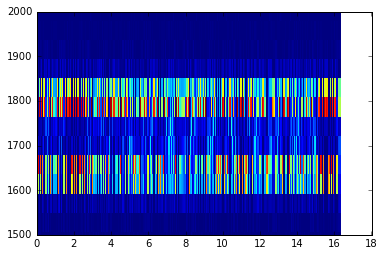

In [7]:
view(data)

In [8]:
lower_band_filter = filters.bandpass(1500,1700,0.002,rate)
upper_band_filter = filters.bandpass(1700,1900,0.002,rate)

In [9]:
lower_band = signal.convolve(lower_band_filter, data)
upper_band = signal.convolve(upper_band_filter, data)

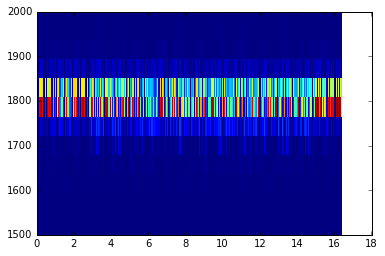

In [17]:
view( upper_band )

In [21]:
lower_band_power = lower_band
upper_band_power = upper_band

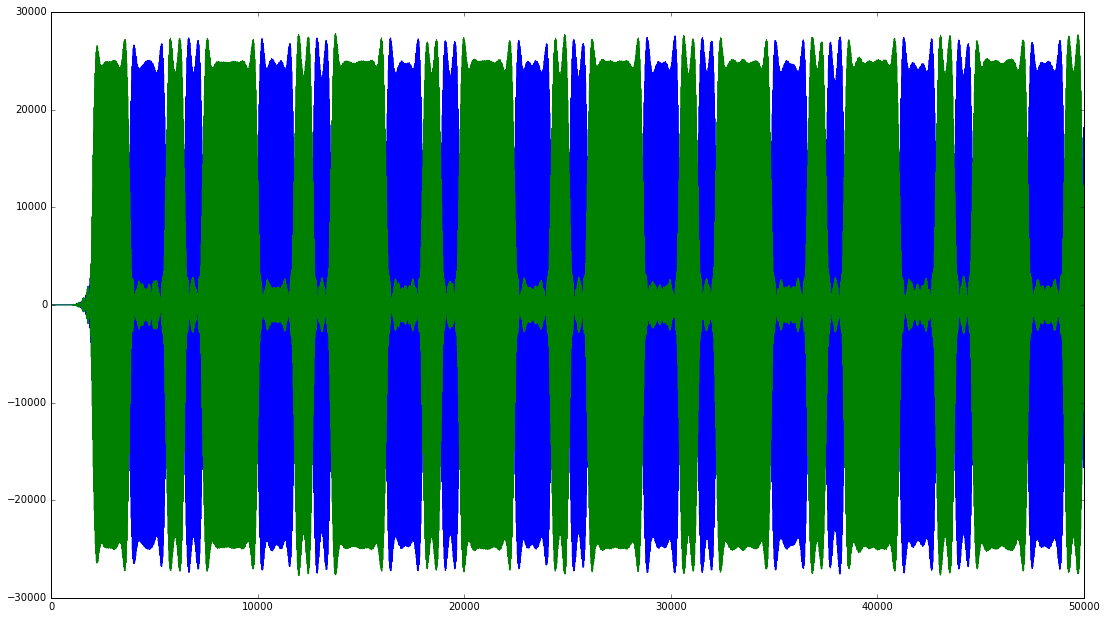

In [22]:
plt.plot( lower_band_power[0:50000])
plt.plot( upper_band_power[0:50000])
plt.gcf().set_size_inches(18.5, 10.5)

In [13]:
smoothing_filter = filters.rolling(100)
lower_band_smooth = signal.convolve( smoothing_filter, lower_band_power )
upper_band_smooth = signal.convolve( smoothing_filter, upper_band_power )

In [14]:
digital = upper_band_smooth > lower_band_smooth

In [79]:

least_run = float("inf")
current_run = 0
last = digital[2000]
for s in digital[2000:20000]:
    #print(s)
    if s == last:
        #print("[NEXT]",least_run, current_run)
        current_run += 1
    else:
        #print("[ELSE]",least_run, current_run)
        
        if current_run < least_run:
            #print("[RESET]",least_run, current_run)
            least_run = current_run
            
        current_run = 0
        
    last = s
        

cycle = int(least_run)

clock_pulse = np.zeros(cycle)
clock_pulse[0] = 1
clock = np.tile(clock_pulse,100)

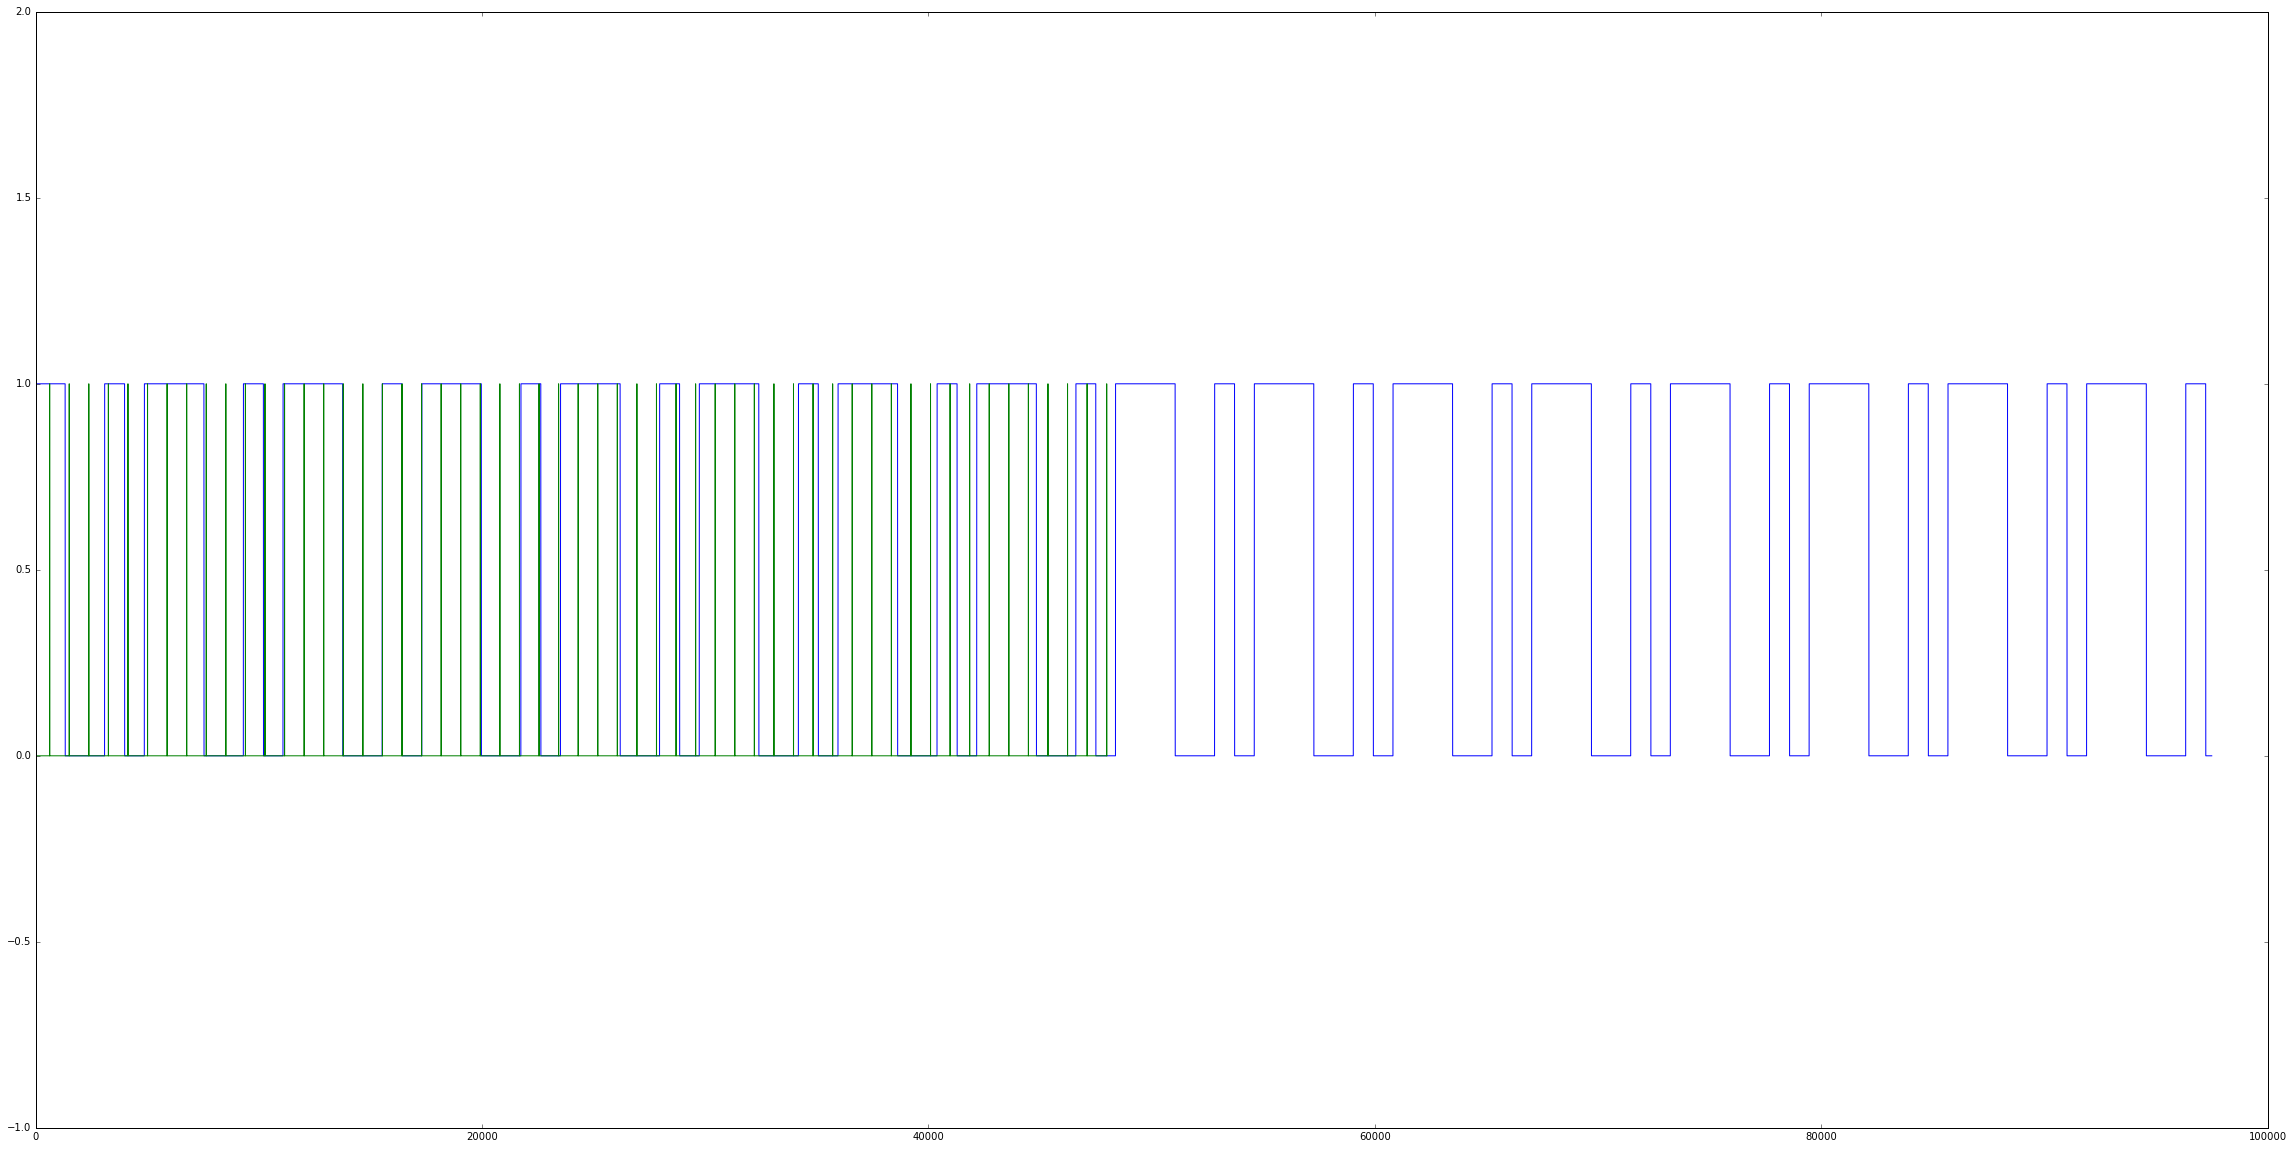

In [80]:
plt.plot(digital[2500:100000])
plt.plot(clock[2000:50000])
plt.ylim(-1,2)
plt.gcf().set_size_inches(40, 20)

In [82]:
data = digital[2500::int(cycle)]

for group in grouper(data,7):
    group = list(group)
    
    if None in group:
        continue
    
    str_list = list(map( lambda v: str(int(v)), group ))
    code = reduce(lambda a,b : a + b, str_list, '')
    
    print(code, get_ccir(code))

1100101 L
1100101 L
1100101 L
1100101 L
1100101 L
1100101 L
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1110010 B
1111001 None
0111001 M
0111000 None
1110100 T
1111011 None
0011001 None
1100110 None
0111000 None
1001110 U
0111010 X
1111101 None
0010111 J
1100110 None
1111000 None
0111010 X
1110101 None
0111100 V
1100011 Z
0101011 Y
1100110 None
1010111 None
0100011 None
1101100 None
0101110 Q
1100110 None
0111010 X
1011011 None
1101100 None
1101100 None
0111110 None
1010110 E
1010011 D
0110101 G
1001011 S
1011001 N
1011100 None
1011001 N
1011110 None
0001110 None
1101001 H
0111111 None
1110010 B
1010011 D
1110101 None
1101001 H
1111001 None
1010110 E
1010111 None
1011101 None
0010000 None
1011100 None
1011011 None
1110011 None
1100111 None
1011001 N
0111001 M
1000100 None
1111001 None
0000110 None
0100111 W
1000011 None
1010111 None
0101001 None
1101100 None
0111001 M
1001101 I
1101010 None
0111110 None
0110100 None
0111001 M
1110

In [68]:
least_run

877

In [71]:
cycle

929